In [176]:
import pandas as pd
from sqlalchemy import create_engine

# Connect
engine = create_engine("sqlite:///stonks.db")

#Query all rows for this stock
df = pd.read_sql(f"SELECT * FROM prices WHERE Ticker='{"AAPL"}' AND Date >= '2019-01-01' ORDER BY Date", engine)

df.head()


,Date,Open,High,Low,Close,Volume,Ticker,Target
0,2019-01-02 00:00:00.000000,36.818556,37.759881,36.661668,37.538811,148158800,AAPL,0
1,2019-01-03 00:00:00.000000,34.225170,34.638783,33.754510,33.799675,365248800,AAPL,1
2,2019-01-04 00:00:00.000000,34.355912,35.311499,34.182386,35.242561,234428400,AAPL,0
3,2019-01-07 00:00:00.000000,35.347163,35.378067,34.681581,35.164127,219111200,AAPL,1
4,2019-01-08 00:00:00.000000,35.551584,36.088807,35.304370,35.834457,164101200,AAPL,1


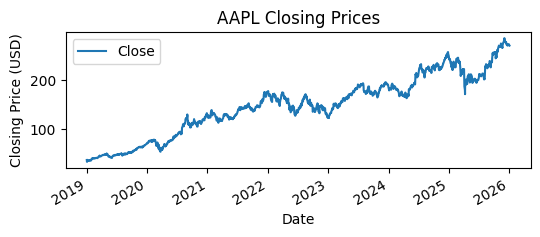

In [177]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
# Plot
df.plot(x='Date', y='Close', title='AAPL Closing Prices', figsize=(6,2))
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

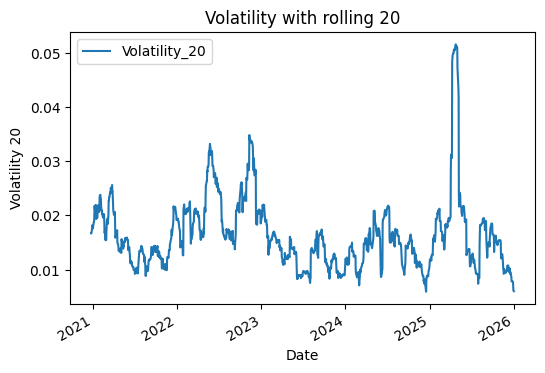

In [178]:
from src.pipeline import add_features

df_feat = add_features(df)

df_feat.plot(x='Date', y='Volatility_20', title='Volatility with rolling 20', figsize=(6, 4))
plt.xlabel('Date')
plt.ylabel('Volatility 20')
plt.show()

In [179]:
# engine = create_engine("sqlite:///GSPC.db")
# df = pd.read_sql("SELECT * FROM gspc_prices WHERE Date >= '2000-01-01';", engine)

# df['Date'] = pd.to_datetime(df['Date'])
# # Plot
# df.plot(x='Date', y='Close', title='GSPC Closing Prices', figsize=(6,2))
# plt.xlabel('Date')
# plt.ylabel('Closing Price (USD)')
# plt.show()


In [180]:
df = pd.read_sql("SELECT COUNT (DISTINCT Ticker) FROM prices;", engine)
print(df)

df = pd.read_sql("SELECT COUNT(*) FROM prices WHERE Ticker = 'AAPL';", engine)
print((df))


# num_tickers = pd.read_sql("SELECT COUNT(DISTINCT Ticker) AS num_tickers FROM prices;", engine)
# print(num_tickers)

   COUNT (DISTINCT Ticker)
0                      503
   COUNT(*)
0      5032


In [181]:
from src.pipeline import add_features
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("sqlite:///stonks.db")

ticker = "AAPL"
df = pd.read_sql(f"SELECT * FROM prices WHERE Ticker='{ticker}' AND Date >= '2019-01-01' ORDER BY Date", engine)

df_feat = add_features(df) 

# 3️⃣ “Query” i pandas
# Eksempel: gjennomsnitt og min aggregasjon
summary = df_feat.groupby("Ticker").agg(
    avg_vol=("Volatility_60", "mean"),
    avg_mom=("Momentum_60", "mean"),
    worst_dd=("Drawdown", "min")
).reset_index()

print(summary.head())


  Ticker   avg_vol   avg_mom  worst_dd
0   AAPL  0.016963  0.048068 -0.333605


In [182]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine("sqlite:///stonks.db")

# Example: distinct tickers
num_tickers = pd.read_sql("SELECT COUNT(DISTINCT Ticker) AS num_tickers FROM prices;", engine)
print(num_tickers)

# Example: ticker with minimum rows
min_ticker = pd.read_sql("""
SELECT Ticker, COUNT(*) AS num_rows
FROM prices
GROUP BY Ticker
ORDER BY num_rows ASC
LIMIT 1;
""", engine)
print(min_ticker)

# Example: ticker with maximum rows
max_ticker = pd.read_sql("""
SELECT Ticker, COUNT(*) AS num_rows
FROM prices
GROUP BY Ticker
ORDER BY num_rows DESC
LIMIT 1;
""", engine)
print(max_ticker)

# Example: average rows per ticker
avg_rows = pd.read_sql("""
SELECT AVG(num_rows) AS avg_rows_per_ticker
FROM (
    SELECT COUNT(*) AS num_rows
    FROM prices
    GROUP BY Ticker
);
""", engine)
print(avg_rows)


   num_tickers
0          503
  Ticker  num_rows
0      Q        47
  Ticker  num_rows
0   ZBRA      5032
   avg_rows_per_ticker
0          4605.648111


In [ ]:
# from sqlalchemy import create_engine
# import pandas as pd
# from model1 import prepare_data, evaluate_models_precision #train_selected_models
# # Connect
# engine = create_engine("sqlite:///stonks.db")

# tickers = ["GOOGL", "AAPL", "MSFT", "AMZN", "META"]
# start_date = "2015-01-01"
# #Query all rows for this stock

# results = {}
# for ticker in tickers:
    
#     df = pd.read_sql("SELECT * FROM prices WHERE Ticker=:t AND Date >= :d ORDER BY Date",
#                  engine, params={"t": ticker, "d": start_date}
#                  )
    
#     X, y = prepare_data(df)
    
#     print(f"Processing {ticker}...")

#     models, precision_result = evaluate_models_precision(X, y, test_size=100)

#     results[ticker] = precision_result
#     print()
#     pd.DataFrame(results).T.to_csv("precision_results.csv")
#     # print("Saved to model_results.csv")




: 